# Bode Plots

In [6]:
import control
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
s = control.tf([1, 0], [0, 1])

## Derivative Terms

$ G(s) = s$

In [7]:
import control

TransferFunction(array([1, 1]), array([1]))

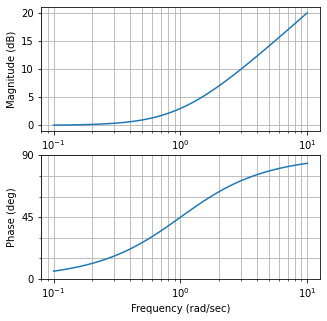

In [8]:
G_D = (s+1)
control.bode(G_D, dB=True);
G_D

## Integral Terms

$ G(s) = \dfrac{1}{s}$

TransferFunction(array([1]), array([1, 0]))

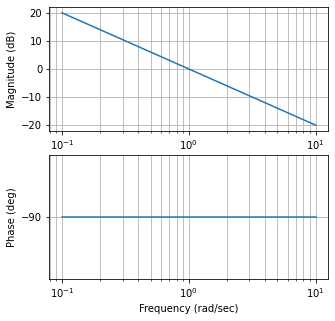

In [13]:
G_I = 1/s
control.bode(G_I, dB=True);
G_I

## First Order Zeros

$ G(s) = \dfrac{s + \omega}{\omega} = s/\omega + 1$

TransferFunction(array([1, 1]), array([1]))

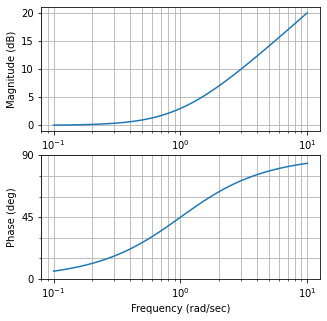

In [14]:
G_FZ = (s+1)/1
control.bode(G_FZ, dB=True);
G_FZ

## First Order Poles

$ G(s) = \dfrac{\omega}{s + \omega} = \dfrac{1}{s/\omega + 1}$

TransferFunction(array([1]), array([1, 1]))

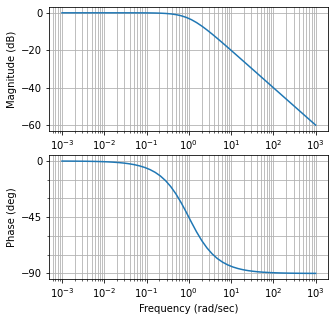

In [15]:
G_FP = 1/(s+1)
control.bode(G_FP, dB=True, omega=np.logspace(-3, 3));
G_FP

## Second Order Poles: Case 1, Real Poles

$G(s) = \dfrac{\omega_n}{s^2 + 2 \zeta \omega_n s + \omega_n^2}$

$\zeta >= 1$

Factor into two first order real poles.

If $\zeta < 1$, you get oscillation, and complex poles.

roots [-7.07+7.07213546j -7.07-7.07213546j]


TransferFunction(array([100]), array([  1.  ,  14.14, 100.  ]))

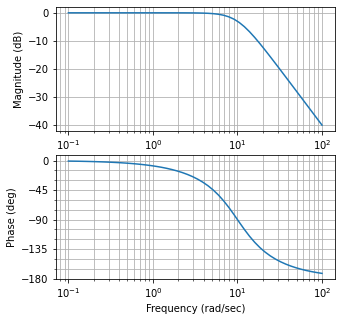

In [19]:
zeta = 0.707
wn = 10

G_SR = wn**2/(s**2 + 2*zeta*wn*s + wn**2)
control.bode(G_SR, dB=True);
print('roots', np.roots([1, 2*zeta*wn, wn**2]))
G_SR

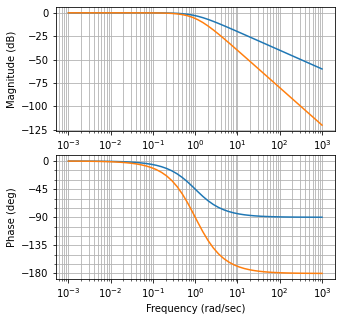

In [20]:
control.bode([1/(s+1), 1/(s+1)**2], dB=True, omega=np.logspace(-3, 3));

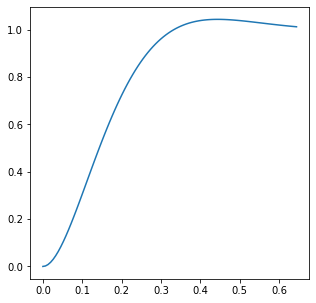

In [22]:
t, y = control.step_response(G_SR)
plt.plot(t, y)

## Second Order Poles: Case 2, Imaginary Poles

$G(s) = \dfrac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}$

$\zeta < 1$

TransferFunction(array([1]), array([1. , 0.2, 1. ]))

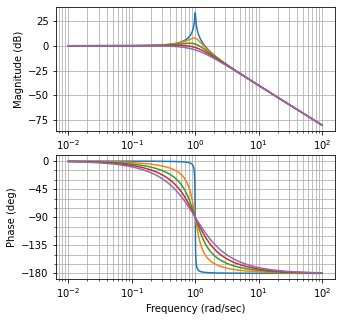

In [23]:
zeta = 0.1
wn = 1

G_SR = 1/(s**2 + 2*zeta*wn*s + wn**2)
G_damp = [1/(s**2 + 2*zeta*wn*s + wn**2) for zeta in np.arange(0.01, 0.9, 0.2)]
control.bode(G_damp, dB=True, omega=np.logspace(-2, 2, 1000));
G_SR

In [24]:
G = 1/s**2
H = 2 + 0.001/s + 3*s*(20/(s+20)) 

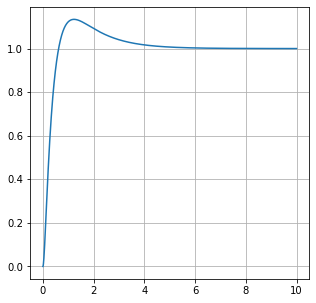

In [25]:
Gc = G*H/(1 + G*H)
t, y = control.step_response(Gc, T=np.linspace(0, 10, 1000))
plt.plot(t, y)
plt.grid()

In [26]:
control.margin(Gc)

(inf, 136.11254535012802, nan, 2.38331710968022)

## Unstable Poles and Zeros

* Same magnitude
* Oppositive phase

$G(s) = \dfrac{1}{s + 1}$

vs. 

$G(s) = \dfrac{1}{s - 1}$

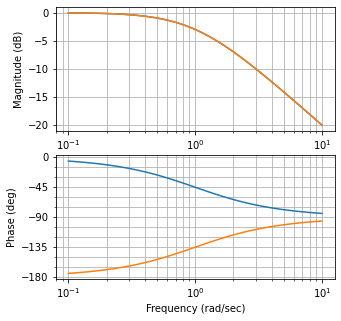

In [28]:
control.bode([1/(s+1), 1/(s-1)], dB=True);
ax = plt.gca()

$G(s) = s + 1$

vs. 

$G(s) = s = 1$

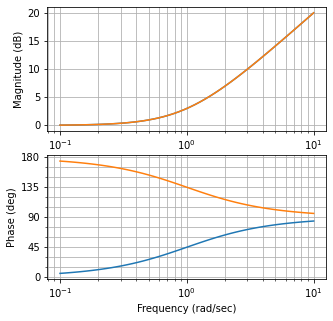

In [29]:
control.bode([(s+1), (s-1)], dB=True);

## Leading Negative

* Add 180 deg phase.

$G(s) = -\dfrac{1}{s + 1}$

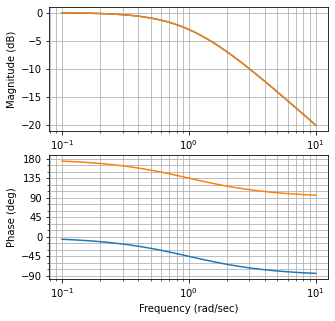

In [30]:
control.bode([1/(s+1), -1/(s+1)], dB=True);

## **Bode Plot Rules Summary**

1. Find $|G(0)|$, where your magnitude plot starts and $|G(\infty)|$, where it ends.
1. Find $\angle G(0)$, where your phase plot starts and $\angle G(\infty)$, where it ends.
1. Make table of slope and phase contribution for each factor. If you have a second order pole or zero if it has real roots, treat as two first order sytems. If it has complex roots, find the natural frequency and the damping ratio. The damping ratio determines the size of the resonant peak, and the natural frequency is the corner frequency.
1. Draw asymptotes using $|G(0)|$ to start the magnitude plot and $\angle G(0)$ to start the phase plot.
1. Interpolate between asymptotes for magnitude and phase.

Zeros:

| factor |    corner freq. (rad/s) |   phase (deg) |  slope (dB/dec) |
|-  -|- -|- -|- -|
|$s$|0 | +90 | +20|
|$(s+\omega)$|$\omega$| +90 | +20|
|$(s-\omega)$|$\omega$| -90 | +20|
|$(s^2 + 2\zeta \omega_n s + \omega_n^2)$|$\omega_n$| +180 | +40|

Poles:

| factor |    corner freq. (rad/s) |   phase (deg) |  slope (dB/dec) |
|-  -|- -|- -|- -|
|$1/s$| 0 | -90 |-20|
|$1/(s+\omega)$|$\omega$|  -90 | -20|
|$1/(s-\omega)$|$\omega$| +90 | -20|
|$1/(s^2 + 2\zeta \omega_n s + \omega_n^2)$|$\omega_n$|  -180 | -40|


## Combining Factors

$G(s) = \dfrac{-1}{(s-1)(s-2)}$

$|G(0)| = |-1/2| = 1/2 \approx -6 dB$

$\angle G(0) = \angle -1/2 = -180 deg$

| factor |    corner freq. (rad/s) |   phase (deg) |  slope (dB/dec) |
|-  -|- -|- -|- -|
|$1/(s-1)$|1|+90|-20|
|$1/(s-2)$|2|+90|-20|

Notice phase contribution of the pole is now positive, since it is an unstable pole.


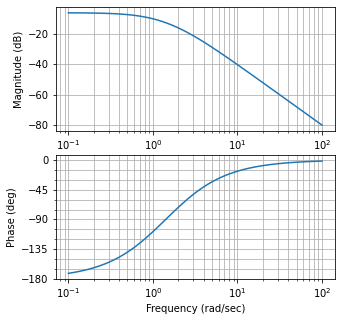

In [31]:
import control
s = control.tf([1, 0], [0, 1])
control.bode(-1/((s-1)*(s-2)), dB=True);